In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

# For plotting puposes
from itertools import cycle
plt.style.use('ggplot')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./wordle-tweets.csv')
tweets = df[:100000]
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [3]:
# print a sample wordle
print(tweets['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [4]:
tweets.dtypes

wordle_id          int64
tweet_id           int64
tweet_date        object
tweet_username    object
tweet_text        object
dtype: object

In [5]:
# coverting "tweet_date" into proper date_time format instead of string

tweets['tweet_datetime'] = pd.to_datetime(tweets.loc[:,'tweet_date'])
tweets['tweet_date'] = tweets['tweet_datetime'].dt.date


In [6]:
# we now want to extract the wordle id from the "tweet_text" column.
tweets['wordle_id']= tweets['tweet_text'].str[:10]
tweets['id'] = tweets['wordle_id'].str[-3:]
# here we want to extract the number of attempts it took for the user to solve the wordle
tweets['n_attempts']= tweets['tweet_text'].str[11].astype('int')

In [7]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,id,n_attempts
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,210,4
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,210,4
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,210,4
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,210,3
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,210,3
...,...,...,...,...,...,...,...,...
99995,Wordle 229,1489234189916454916,2022-02-03,ericnear,Wordle 229 4/6\n\n⬛⬛⬛⬛🟨\n⬛⬛🟩⬛⬛\n⬛🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-02-03 13:47:54+00:00,229,4
99996,Wordle 229,1489234194131832834,2022-02-03,CatLadyTine,Wordle 229 3/6\n\n🟩⬛🟩🟩⬛\n🟩⬛🟩🟩⬛\n🟩🟩🟩🟩🟩,2022-02-03 13:47:55+00:00,229,3
99997,Wordle 229,1489234194291204097,2022-02-03,PatrickFMay,Wordle 229 4/6\n\n⬛⬛⬛🟨🟨\n⬛🟨🟩⬛⬛\n⬛⬛🟩🟩🟩\n🟩🟩🟩🟩🟩,2022-02-03 13:47:55+00:00,229,4
99998,Wordle 229,1489234195943768064,2022-02-03,sharrminaa,Wordle 229 5/6\n\n⬛🟨🟩🟨🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩⬛\n...,2022-02-03 13:47:55+00:00,229,5


In [8]:
tweets['tweet_date'].value_counts()

2022-01-28    15937
2022-01-30     7017
2022-01-27     6747
2022-01-26     6634
2022-01-29     6628
2022-02-02     6621
2022-01-23     6549
2022-02-01     6465
2022-01-31     6402
2022-01-21     6230
2022-01-25     3337
2022-01-24     2930
2022-01-22     2921
2022-02-03     2842
2022-01-17     2830
2022-01-16     2730
2022-01-20     2694
2022-01-18     2365
2022-01-19     2121
Name: tweet_date, dtype: int64

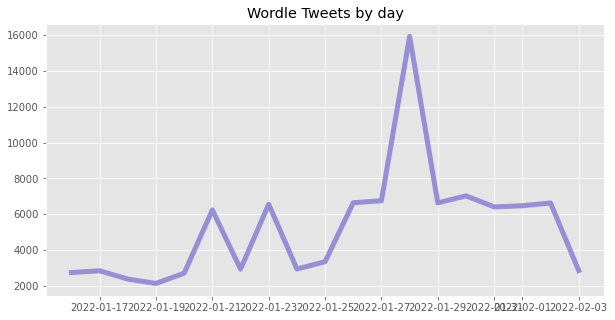

In [9]:
tweets['tweet_date'].value_counts() \
                    .plot(figsize = (10,5), title = 'Wordle Tweets by day',
                         color = color_pal[2], lw = 5)
plt.show()

## Number of Attempts Analysis


In [10]:
tweets.groupby('wordle_id')['n_attempts'].value_counts() \
                                            .unstack() \
                                            .style.background_gradient(axis = 1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## How many attempts does it usaually take to solve? 

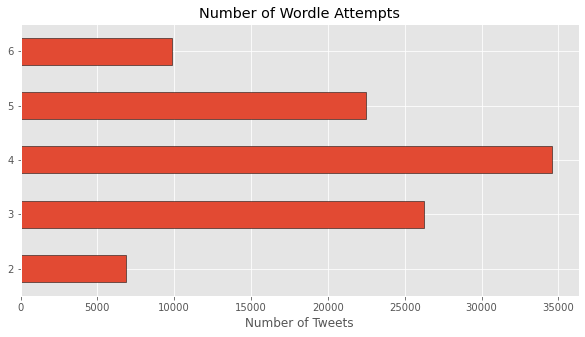

In [11]:
ax = tweets['n_attempts'].value_counts() \
                    .sort_index() \
                    .plot(kind = 'barh', edgecolor = 'black',
                          title = 'Number of Wordle Attempts',
                         figsize =(10,5))
ax.set_xlabel('Number of Tweets')
plt.show()